**Problem Statement**

This is a problem to identify wheather a given movie review is positive or negative.
The reviews will be fetched from IMDB depending on which movie user selects for his recommendation, then some of the reviews from IMDB will be displayed alongside recommended movies.
This is Natural Language Processing problem and in this notebook we will using RNN LSTM deep learning model.

# Step 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import json

# Step 2 - Importing the dataset

In [2]:
data = pd.read_csv('/content/drive/My Drive/Data Science Projects/dataset_movies/imdb dataset.csv')
data['sentiment'] = data['sentiment'].map({'positive':1, 'negative':0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Step 3 - Making independent variable X and dependent variable Y

In [3]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [4]:
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [5]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

# Step 4 - Splitting dataset into Training and Test

In [6]:
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

# Step 5 - Tokenizing the data

In [7]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

wordsindices = (tokenizer.word_index)

uniquetokens = len(wordsindices)

In [8]:
print(uniquetokens)

118563


# Step 6 - Padding Sequences

In [9]:
X_train = pad_sequences(X_train) # Padding sequences to make tham of equal length

T = X_train.shape[1]

X_test = pad_sequences(X_test, maxlen = T) #Paddking according to size of X_train to make it equal


# Step 7 - Creating Deep Learning RNN LSTM model

In [10]:
D = 20 # We can choose dimensionality manually

i = Input(shape = (T,))
x = Embedding(uniquetokens+1, D)(i) #here we have added 1 to uniquetokens because index 0 was reserved for padding thus unique tokens are always 1 more that what is return by tokenizer.word_index
x = LSTM(15, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

his = model.fit(X_train, Y_train , validation_data = (X_test, Y_test), epochs = 15, batch_size = 32)


Epoch 1/15
1407/1407 [==============================] - 117s 83ms/step - loss: 0.3989 - accuracy: 0.8177 - val_loss: 0.3083 - val_accuracy: 0.8668
Epoch 2/15
1407/1407 [==============================] - 117s 83ms/step - loss: 0.2844 - accuracy: 0.8822 - val_loss: 0.2928 - val_accuracy: 0.8726
Epoch 3/15
1407/1407 [==============================] - 117s 83ms/step - loss: 0.2590 - accuracy: 0.8938 - val_loss: 0.3081 - val_accuracy: 0.8638
Epoch 4/15
1407/1407 [==============================] - 118s 84ms/step - loss: 0.2386 - accuracy: 0.9042 - val_loss: 0.2679 - val_accuracy: 0.8864
Epoch 5/15
1407/1407 [==============================] - 119s 84ms/step - loss: 0.2205 - accuracy: 0.9110 - val_loss: 0.2605 - val_accuracy: 0.8948
Epoch 6/15
1407/1407 [==============================] - 118s 84ms/step - loss: 0.2058 - accuracy: 0.9180 - val_loss: 0.2753 - val_accuracy: 0.8892
Epoch 7/15
1407/1407 [==============================] - 118s 84ms/step - loss: 0.1939 - accuracy: 0.9245 - val_loss: 0

# Step 10 - Plotting Loss and Accuracy

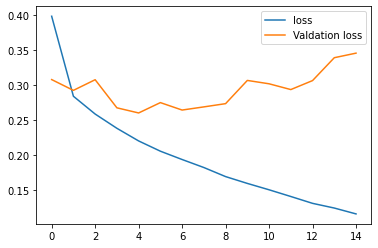

In [11]:
#Plotting Loss

plt.plot(his.history['loss'], label = 'loss')
plt.plot(his.history['val_loss'], label = 'Valdation loss')
plt.legend()


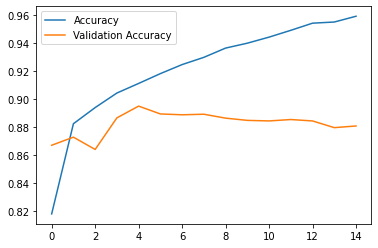

In [12]:
plt.plot(his.history['accuracy'], label='Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# Step 9 - Predicting results and checking accuracy

In [13]:
yhat = model.predict(X_test)
yhat = yhat>=0.5

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, yhat)
accuracy = accuracy_score(Y_test, yhat)

print(accuracy)
print(cm)

0.8806
[[2154  318]
 [ 279 2249]]


# Step 10 - Saving model for future use and deplyoment

In [14]:
import pickle 

# Save weights and architecture

model.save_weights("weights_only.h5")

# Save model config

json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)

with open("T.pkl" , "wb") as filename:
  pickle.dump(T, filename)

with open("tokenizer.pkl" , "wb") as filename:
  pickle.dump(tokenizer, filename)

**Conclusion**

We can see that Deep Learning model RNN LSTM gave a accuracy of around 88 %, thus this is a good model to predict reviews for movies and we will be loading it in the file Predicting Reveiws.ipynb which will be the last file.
